https://jojo-ds-nlp.blog.csdn.net/article/details/131757371

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [3]:
#定义AlexNet
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x


In [4]:
# 加载 Fashion-MNIST 数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((227,227)),#将原始图像扩宽到227×227
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)


In [6]:
# 设置gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [7]:
# 初始化AlexNet模型
model = AlexNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)



Epoch [1/10], Train Loss: 2.2666, Test Loss: 1.3362, Acc: 46.02%
Epoch [2/10], Train Loss: 0.8291, Test Loss: 0.7304, Acc: 72.62%
Epoch [3/10], Train Loss: 0.5740, Test Loss: 0.5220, Acc: 80.96%
Epoch [4/10], Train Loss: 0.4810, Test Loss: 0.4677, Acc: 82.90%
Epoch [5/10], Train Loss: 0.4265, Test Loss: 0.4303, Acc: 84.43%
Epoch [6/10], Train Loss: 0.3886, Test Loss: 0.3877, Acc: 85.58%
Epoch [7/10], Train Loss: 0.3607, Test Loss: 0.3525, Acc: 86.78%
Epoch [8/10], Train Loss: 0.3396, Test Loss: 0.3355, Acc: 87.96%
Epoch [9/10], Train Loss: 0.3241, Test Loss: 0.3316, Acc: 87.84%
Epoch [10/10], Train Loss: 0.3093, Test Loss: 0.3121, Acc: 88.46%


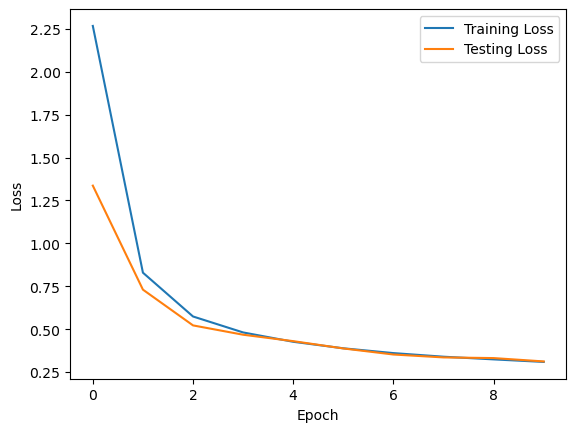

In [8]:
# 训练AlexNet模型
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0

    # 训练模型
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # 测试模型
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    avg_test_loss = test_loss / len(test_loader)
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Acc: {correct/total*100:.2f}%")

# 绘制测试误差和训练误差曲线
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

